In [57]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot') #enables drawings
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) #Adjusts plot configuration

#Declare dataframe
df = pd.read_csv(r'C:\Users\itoka\Downloads\movies.csv')

In [58]:
#Glance at Dataframe
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [59]:
#Detecting percent of missing data using for loop

for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [60]:
# Data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [61]:
#Changes data type of column
df = df.fillna(0) #have to use this because dataframe too big


df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [62]:
df = df.dropna() #removing rows that contain null values

In [63]:
#Create correct year column because some years don't match with their actual released date
df['year correct'] = df['released'].str.extract(pat = '([0-9]{4})').astype(str)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [64]:
#Sorting the Data by Gross descending

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [65]:
pd.set_option('display.max_rows', None)

In [66]:
#Drop any duplicates

df = df.drop_duplicates()

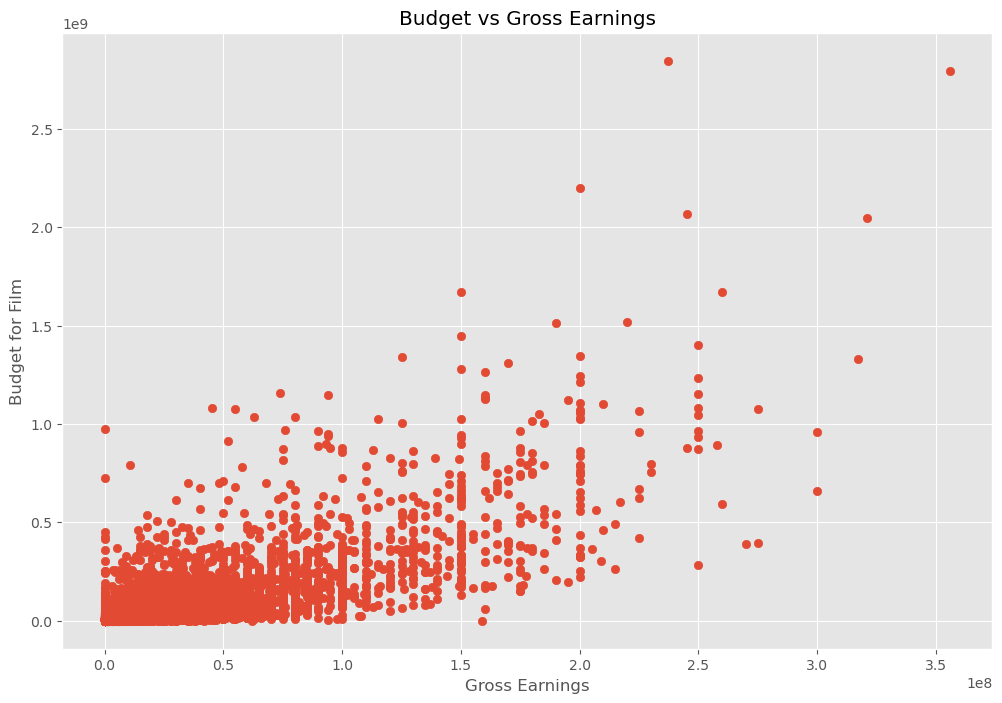

In [67]:
#Creating a Scatterplot using matplotlib

#will look at the relationship between budget and gross earnings

plt.scatter(x=df['budget'], y=df['gross']) #creates the plot

plt.title('Budget vs Gross Earnings')  #changes title

plt.xlabel('Gross Earnings')
#labels
plt.ylabel('Budget for Film')

plt.show()

In [68]:
df.corr(method = 'pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [69]:
#High correlation between budget and gross
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<function matplotlib.pyplot.show(close=None, block=None)>

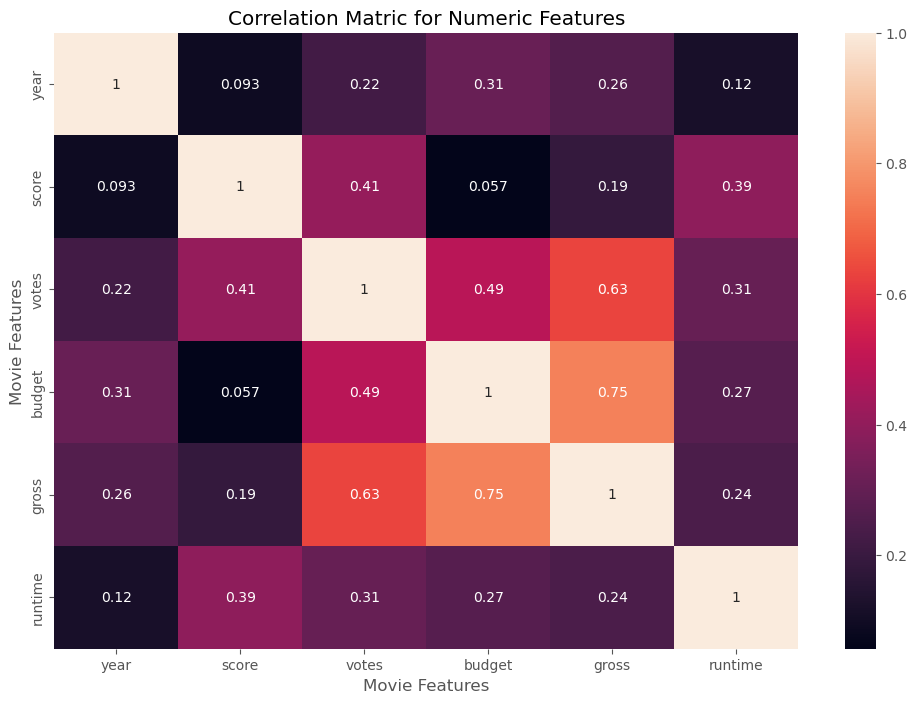

In [70]:
#Creating a heatmap

correlation_matrix = df.corr(method = "pearson")

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show

In [74]:
#Want to create a larger correlation matrix
#Have to eliminate object types and replace them as numeric

df_numerized = df
for colm in df_numerized:
    if df_numerized[colm].dtype == 'object':
        df_numerized[colm] = df_numerized[colm].astype('category')
        df_numerized[colm] = df_numerized[colm].cat.codes



<function matplotlib.pyplot.show(close=None, block=None)>

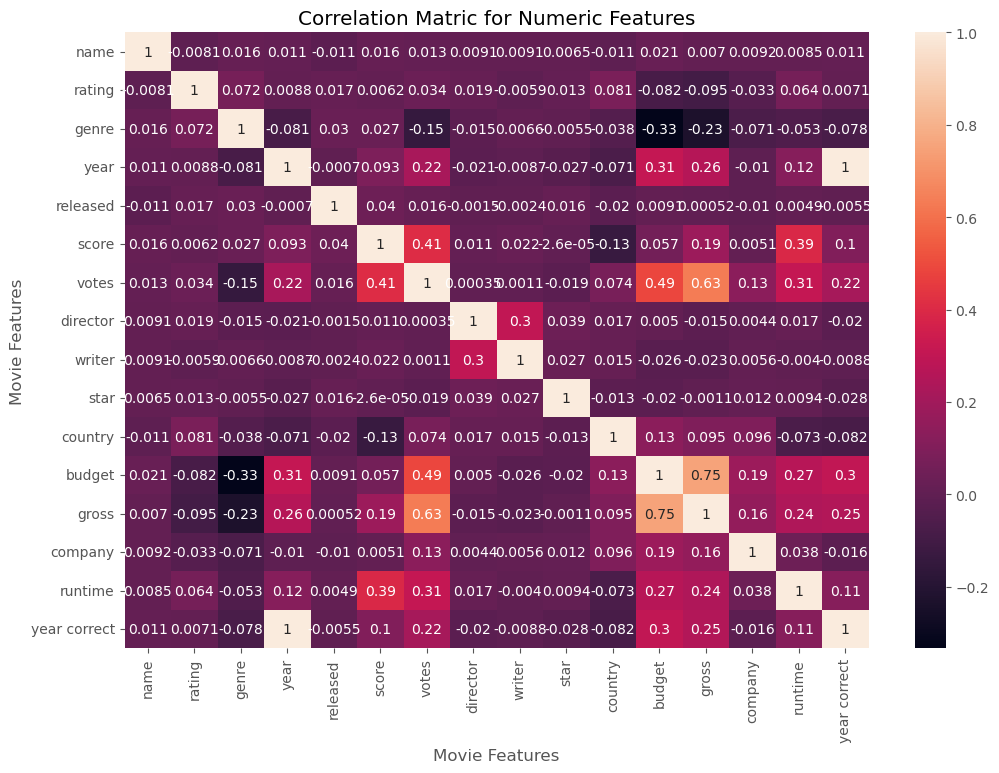

In [75]:
correlation_matrix = df_numerized.corr(method = "pearson")

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')
plt.show

In [72]:
df_numerized.corr() #looks at correlation table

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year correct
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,0.011134
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,0.007054
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,-0.077550
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,0.997295
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852,-0.005455
score,0.016377,0.006192,0.027384,0.092616,0.039814,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005081,0.394564,0.100212
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,0.217856
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.020439
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,-0.008807
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,-0.027576


In [76]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack() #makes it more presentable
corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
              score           0.016377
              votes           0.013038
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020548
              gross           0.006989
              company         0.009211
              runtime         0.008483
              year correct    0.011134
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score           0.006192
              votes           0.033743
              director        0.019483
              writer         -0.005921
              star       

In [64]:
sorted_pairs = corr_pairs.sort_values()
#will sort the values from lowest correlation to highest correlation

sorted_pairs

budget        genre          -0.356564
genre         budget         -0.356564
              gross          -0.235650
gross         genre          -0.235650
rating        budget         -0.176002
budget        rating         -0.176002
genre         votes          -0.145307
votes         genre          -0.145307
score         country        -0.133348
country       score          -0.133348
rating        gross          -0.107339
gross         rating         -0.107339
year correct  country        -0.082274
country       year correct   -0.082274
year          genre          -0.081261
genre         year           -0.081261
country       runtime        -0.078412
runtime       country        -0.078412
genre         year correct   -0.077550
year correct  genre          -0.077550
company       genre          -0.071067
genre         company        -0.071067
country       year           -0.070938
year          country        -0.070938
genre         runtime        -0.052711
runtime       genre      

In [65]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
#assuming that 'high correlation' is anything above 0.5, we can filter the results out

high_corr


#From the data, we know that the 1s can be ignored because they are comparing the same variable so it is 
#inevitably going to be 1. The year correct and the year are extremely correlated because it has the same date number. 
#The only reason why it's not 1 is because some of the years are incorrect, hence why we made a year correct column
#So, we can also ignore this one too. 
#Therefore, we can see that budget and gross had the highest correlation in the data

gross         votes           0.630757
votes         gross           0.630757
gross         budget          0.740395
budget        gross           0.740395
year correct  year            0.997295
year          year correct    0.997295
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year correct  year correct    1.000000
dtype: float64